# Gradient Descent Logistic Regression analyis on the Wine dataset
In this programm we run a Gradient Descent (GD) Logistic Regression analysis on the wine dataset and see how
well we are able to classify wines depending on their characteristics (e.g., alcohol, malic_acid color intensity, hue etc.). 



See the Documentation of the Wine Dataset for more on this particular dataset


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html


In [183]:
# ========== Part 1: importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

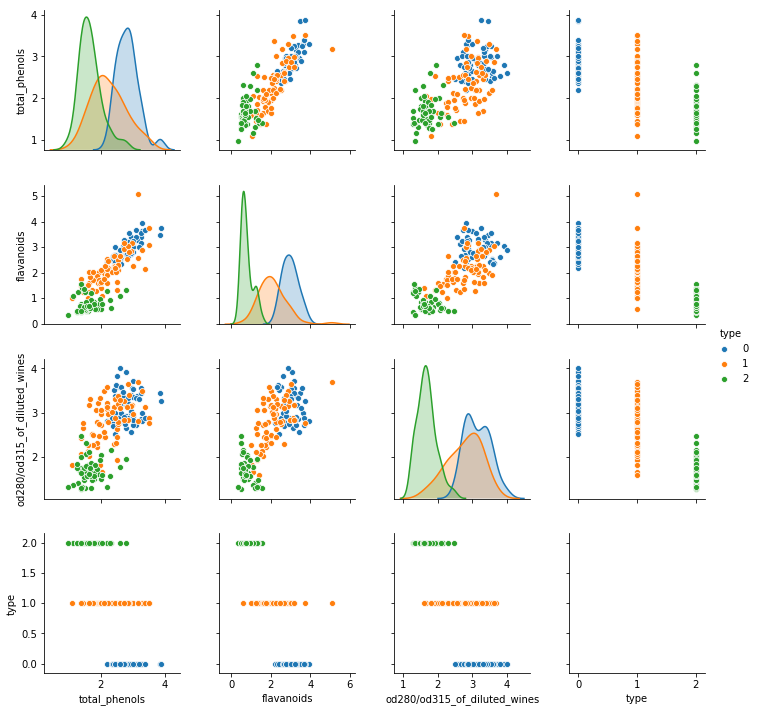

In [184]:
# ========== Part 2: loading the data
wine = datasets.load_wine()
df = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])

# adding the target variable to the dataframe
df['type'] = wine['target']

# looking at the target_names
#print(wine['target_names']) # since these names are not adding anything, we will leave targets as 0,1,2

# counting the number of casses per class
df['type'].value_counts() # 59 of 0, 71 of 1 and 48 of 2

# missing values
df.isnull().mean() #no missing values for any of our features

# looking at the correlation of all features 
df.corr()

# making a selection of features
cols = ['total_phenols','flavanoids','od280/od315_of_diluted_wines','type']

# making a scattermatrix using the features most strongly correlated with wine type
sns.pairplot(df[cols],hue="type");


In [185]:
# ========== Part 3: Splitting the Data into a training and testing set and Feature Normalization
# NOTE: we will from now on only look at class 1 versus 2 (i.e., a binary classification)
df['type'] = df['type'].replace({2:0}) # making it into a binary classification with class 1 or 0

X = df.iloc[59:,:13].values
y = df.iloc[59:,13].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Normalization of the X_train and X_test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

df_train = pd.DataFrame(data = X_train,columns = wine['feature_names'])
df_train['type'] = y_train

df_test = pd.DataFrame(data = X_test,columns = wine['feature_names'])
df_test['type'] = y_test


In [186]:
# ========== Part 4: Calculating the Cost J of theta
# adding a bias unit to the X-matrix
m = len(y_train)
X_train_padded = np.column_stack((np.ones((m,1)),X_train_std))
theta = np.zeros((X_train_padded.shape[1],1))

class CostFunction(object):
    def CostFunctionJ(self,X,y,theta):
        m = len(y_train)
        # calculating the Cost for our initial set of parameters
        J = 0
        hyp = (1.0 / (1.0 + np.exp(-X.dot(theta))))
        J = -y.dot(np.log(hyp)) - ((1-y).dot(np.log(1-hyp)))
        return J

print('The initial Cost J of theta is\n', CostFunction().CostFunctionJ(X_train_padded,y_train,theta))


The initial Cost J of theta is
 [61.69009907]


In [187]:
# ========== Part 5: Gradient Descent Algorithm to find the minimum Cost J of theta
alpha = 0.01 # learning rate
epochs = 1000 # number of iterations
J_history = [] # in order to plot the Cost as a function of iteration #
iteration_nr = []

class GD(object):
    def GradientDescent(self,alpha,epochs):
        theta = np.zeros((X_train_padded.shape[1],1))
        n = float(len(y_train))
        
        for i in range(epochs):
            J = 0
            hyp = (1.0 / (1.0 + np.exp(-X_train_padded.dot(theta))))
            J = -y_train.dot(np.log(hyp)) - ((1-y_train).dot(np.log(1-hyp)))
            iter = i+1
            J_history.append(J)
            iteration_nr.append(iter)
            
            # calculating the gradient and updating coefficients
            gradient = (1/n) * X_train_padded.T.dot(hyp - np.transpose([y_train]))
            theta = theta - alpha * gradient
            
        return theta
        
final_theta = GD().GradientDescent(alpha,epochs) 

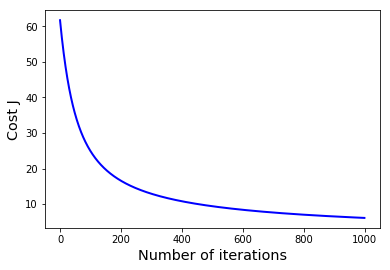

In [188]:
# ========== Part 5A: Plot of J of theta

# Plot the convergence graph
plt.plot(range(len(J_history)), J_history, "-b", linewidth=2 )
plt.xlabel('Number of iterations',fontsize='x-large')
plt.ylabel('Cost J',fontsize='x-large')
plt.show(block=False)


In [189]:
# ========== Part 6: looking at the accuracy of our Model within the training data
y_train_pred = (1.0 / (1.0 + np.exp(-X_train_padded.dot(final_theta))))
y_train_prediction = np.zeros(len(y_train))

for i in range(len(y_train_pred)):
    if y_train_pred[i] >= 0.5:
        y_train_prediction[i] = 1
    else:
        y_train_prediction[i] = 0
        
correctness = y_train_prediction == y_train
df_train['correct'] = correctness

accuracy = df_train['correct'].mean()*100
print('The Logistic regression algorithm has an accuracy of\n\n',"{:.2f}".format(accuracy) + str("%"))


The Logistic regression algorithm has an accuracy of

 98.88%


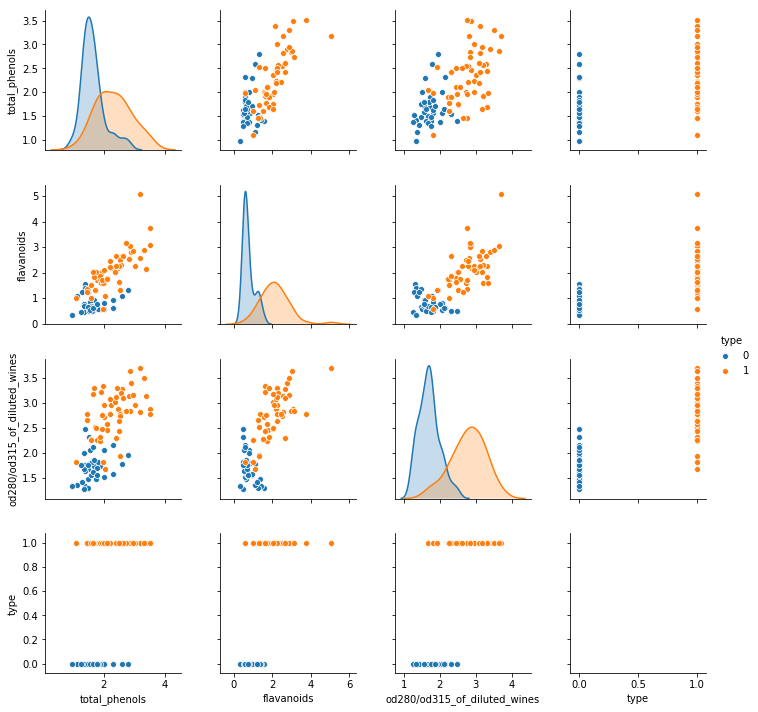

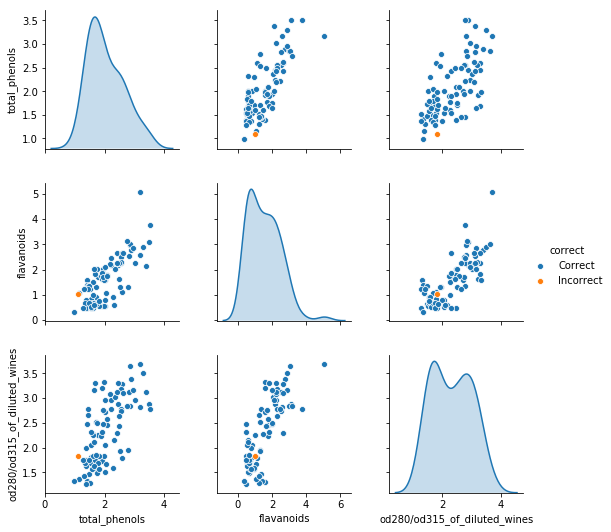

In [191]:
# ========== Part 7: Plotting the predictions of our Model for the training data
df_train['correct'] = df_train['correct'].replace({True: 'Correct',False: 'Incorrect'})

# Plotting the data for the same selection of features as in the start, as a function of correctness
cols = ['total_phenols','flavanoids','od280/od315_of_diluted_wines','type']
sns.pairplot(df_train[cols],hue='type');

# Plotting the data for the same selection of features as in the start, as a function of correctness
cols = ['total_phenols','flavanoids','od280/od315_of_diluted_wines','correct']
sns.pairplot(df_train[cols],hue='correct');

In [192]:
# ========== Part 8: looking at the accuracy of our Model on the testing data
m = len(y_test)
X_test_padded = np.column_stack((np.ones((m,1)),X_test_std))

y_test_pred = (1.0 / (1.0 + np.exp(-X_test_padded.dot(final_theta))))
y_test_prediction = np.zeros(len(y_test))

for i in range(len(y_test_pred)):
    if y_test_pred[i] >= 0.5:
        y_test_prediction[i] = 1
    else:
        y_test_prediction[i] = 0
        
correctness = y_test_prediction == y_test
df_test['correct'] = correctness

accuracy = df_test['correct'].mean()*100
print('The Logistic regression algorithm has an accuracy of\n\n',"{:.2f}".format(accuracy) + str("%"))


The Logistic regression algorithm has an accuracy of

 93.33%


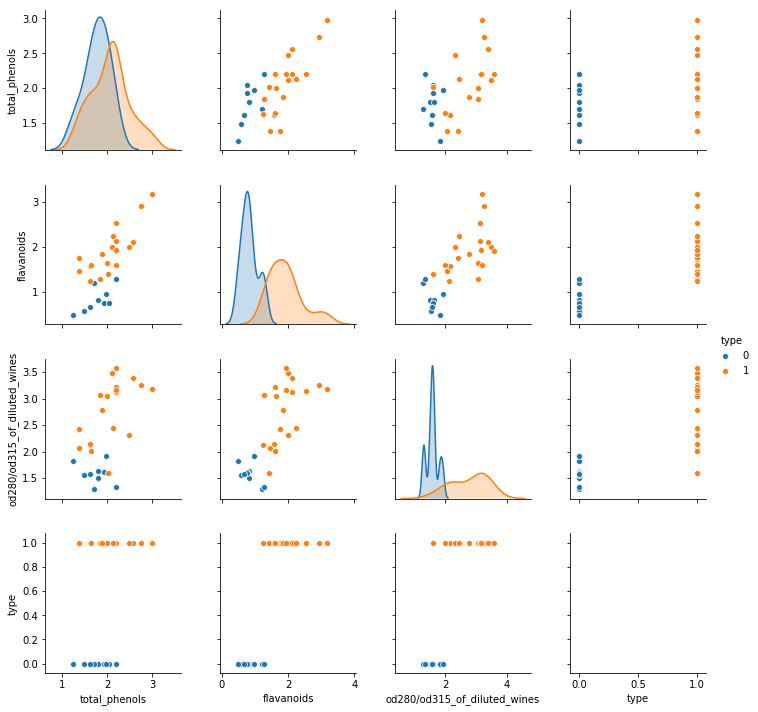

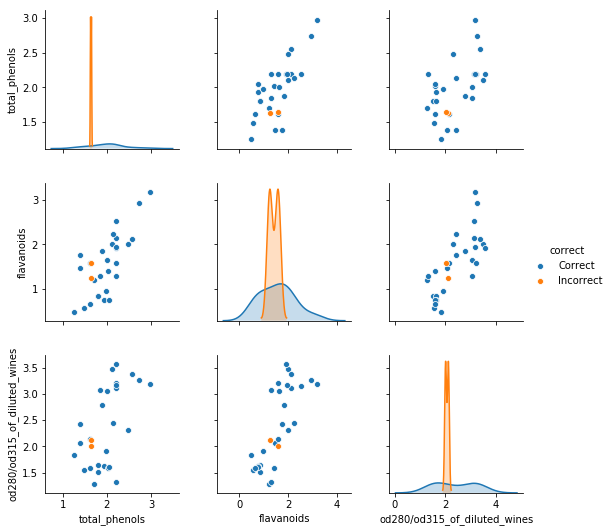

In [193]:
# ========== Part 9: Plotting the predictions of our Model for the testing data
df_test['correct'] = df_test['correct'].replace({True: 'Correct',False: 'Incorrect'})

# Plotting the data for the same selection of features as in the start, as a function of correctness
cols = ['total_phenols','flavanoids','od280/od315_of_diluted_wines','type']
sns.pairplot(df_test[cols],hue='type');

# Plotting the data for the same selection of features as in the start, as a function of correctness
cols = ['total_phenols','flavanoids','od280/od315_of_diluted_wines','correct']
sns.pairplot(df_test[cols],hue='correct');